# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data=pd.read_excel('irisdata.xls')

In [3]:
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

1. Checking for missing values

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

So here there are missing values in SL,SW AND PL

In [8]:
data['SL'].median()

5.8

In [9]:
data['SL'].fillna(data['SL'].median(), inplace=True)

In [10]:
data['SW'].median()

3.0

In [11]:
data['SW'].fillna(data['SL'].median(), inplace=True)

In [12]:
data['PL'].median()

4.35

In [13]:
data['PL'].fillna(data['SL'].median(), inplace=True)

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now it is observed that all the missing values are removed using median imputation method.

2. Checking for outliers.



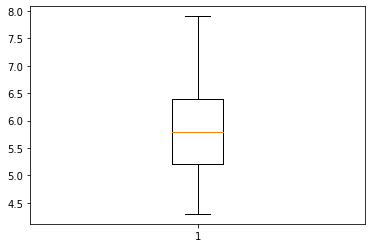

In [16]:
plt.boxplot(data['SL'])
plt.show()

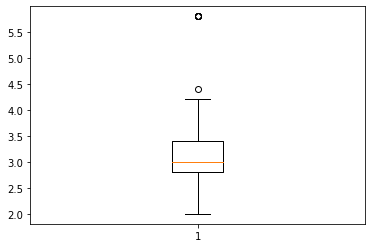

In [17]:
plt.boxplot(data['SW'])
plt.show()

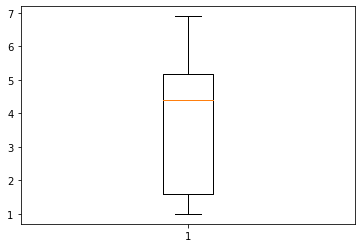

In [18]:
plt.boxplot(data['PL'])
plt.show()

So it is observed that there are outliers in SW coloumn.

In [19]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'Q2=',Q2,'Q3=',Q3)

Q1 =  2.8 Q2= 3.0 Q3= 3.4


In [20]:
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  0.6000000000000001


In [21]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim)
print('Lower limit = ',low_lim)

Upper limit =  4.3
Lower limit =  1.8999999999999997


In [22]:
outlier=[]
for i in data['SW']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
outlier

[5.8, 4.4, 5.8, 5.8, 5.8, 5.8, 5.8]

In [23]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([10, 15, 27, 43, 72, 98, 124], dtype='int64')

In [24]:
data.drop([10, 15, 27, 43, 72, 98, 124  ],inplace=True)

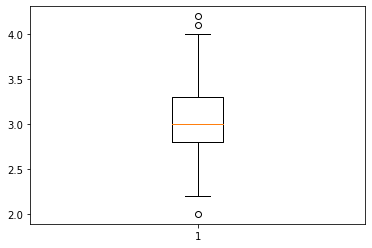

In [25]:
plt.boxplot(data['SW'])
plt.show()

So here outliers in the SW column are handled using IQR method.


VISUALIZATION

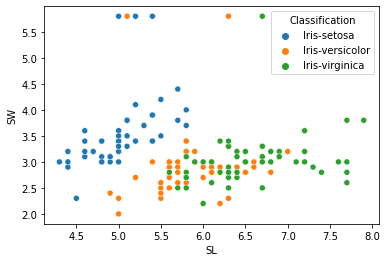

In [56]:
# Scatterplot for SL AND SW
ax = sns.scatterplot(x="SL", y="SW",hue="Classification" ,data=data)

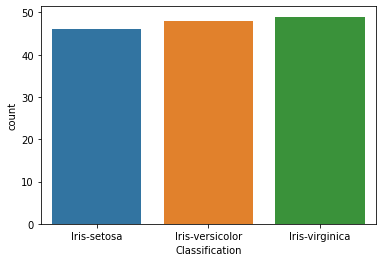

In [27]:
# Countplot for classification
ax=sns.countplot(x='Classification',data=data)
plt.show()

Normalization


In [16]:

y=data['Classification']
x=data.drop(['Classification'],axis=1)

Here we are dropping classification column since it is the target variable.

In [17]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.742937,0.410281,0.460129,0.139856
std,0.054577,0.114038,0.163179,0.078429
min,0.553120,0.238392,0.167836,0.014727
25%,0.706031,0.325686,0.255615,0.048734
50%,0.737917,0.354679,0.537508,0.161602
75%,0.783159,0.521979,0.585627,0.196259
max,0.860939,0.739228,0.729113,0.280419


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# Support vector machine



In [78]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
cr=classification_report(y_test, y_pred)
print(cr)

Confusion matrix
 [[18  0  1]
 [ 0 11  2]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.81      1.00      0.90        13

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.95      0.93      0.93        45



# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)


In [81]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
cr=classification_report(y_test, y_pred)
print(cr)

Confusion matrix
 [[18  0  1]
 [ 0  5  8]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       1.00      0.38      0.56        13
 Iris-virginica       0.59      1.00      0.74        13

       accuracy                           0.80        45
      macro avg       0.86      0.78      0.76        45
   weighted avg       0.88      0.80      0.79        45



# Random Forest algorithm

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [85]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



# KNeighborsClassifier

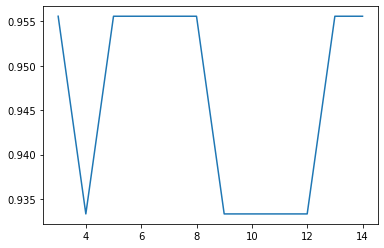

In [86]:
from sklearn.neighbors import KNeighborsClassifier


acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()




In [87]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)



In [88]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[18  0  1]
 [ 0 12  1]
 [ 0  0 13]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



# DecisionTreeClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [90]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
cr=classification_report(y_test, y_pred)
print(cr)

Confusion matrix
 [[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.93      0.93      0.93        45



So it is observed that Random Forest algorithm have outperformed other algorithm with a accuracy of 98 followed by KNeighbours and SVM